In [2]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS 
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_1935/2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [4]:
#Dropping columns
df.drop(columns = {'_merge','Unnamed: 0'}, inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
#Filtterring data to remove 2021
df_2022 = df[df['date'].dt.year == 2022]


In [8]:
df_2022['end_lat'].fillna(df_2022['end_lat'].median(), inplace=True)
df_2022['end_lng'].fillna(df_2022['end_lng'].median(), inplace=True)

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_1935/1160989276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2022['end_lat'].fillna(df_2022['end_lat'].median(), inplace=True)
/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_1935/1160989276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['end_lat'].fil

In [9]:
# Dropping rows where 'start_station_name' or 'start_station_id' have missing values
df_2022.dropna(subset=['start_station_name', 'start_station_id'], inplace=True)


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_1935/2628968364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.dropna(subset=['start_station_name', 'start_station_id'], inplace=True)


In [10]:
# Dropping rows where 'start_station_name' or 'start_station_id' have missing values
df_2022.dropna(subset=['end_station_name', 'end_station_id'], inplace=True)


/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_1935/2743303810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.dropna(subset=['end_station_name', 'end_station_id'], inplace=True)


In [11]:
# Reframe df_2022 into df
df = df_2022.copy()


In [13]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'value'],
      dtype='object')

In [14]:
df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()


In [15]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


In [16]:
print(df_group['value'].sum())
print(df.shape)


29768282
(29768282, 16)


In [18]:
df_group['value'].describe().apply(lambda x: format(x, 'f'))

count    1013397.000000
mean          29.374748
std           99.251800
min            1.000000
25%            1.000000
50%            4.000000
75%           17.000000
max        12041.000000
Name: value, dtype: object

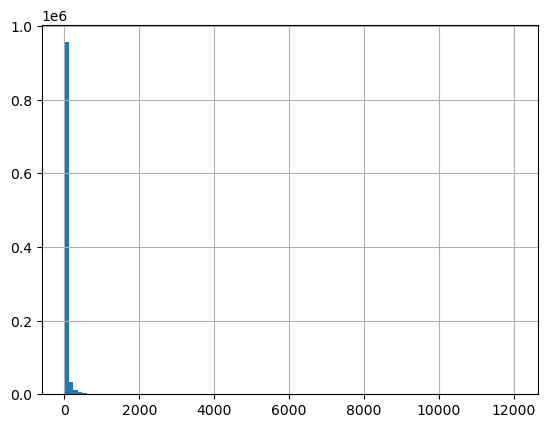

In [19]:
df_group['value'].hist(bins = 100)
plt.show()

[]

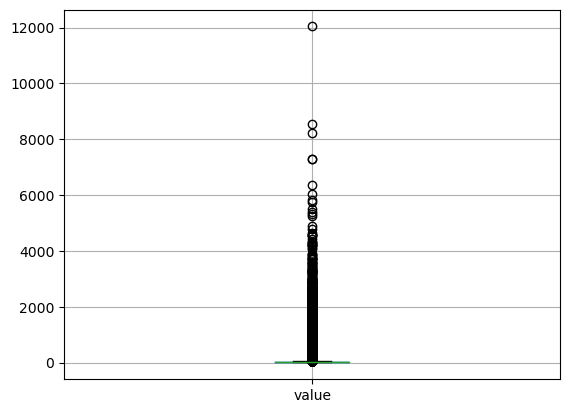

In [20]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [21]:
df_group['value'].sort_index().value_counts()

value
1       268276
2       128313
3        78057
4        54832
5        40763
         ...  
1986         1
1158         1
1682         1
1309         1
5759         1
Name: count, Length: 1848, dtype: int64

In [22]:
df_group.to_csv('df_groupby_final.csv')

In [23]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


In [24]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8,1
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9,1
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6,1
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4,1
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1,1


In [25]:
df_station= df[['start_station_name','end_station_name','start_lat','end_lat','start_lng','end_lng']]

In [26]:
df_station

,start_station_name,end_station_name,start_lat,end_lat,start_lng,end_lng
0,Flatbush Ave & Ocean Ave,3 St & Prospect Park West,40.663657,40.668132,-73.963014,-73.973638
1,Forsyth St\t& Grand St,E 11 St & 1 Ave,40.717798,40.729538,-73.993161,-73.984267
2,Perry St & Bleecker St,Grand St & Greene St,40.735354,40.721700,-74.004831,-74.002381
3,FDR Drive & E 35 St,Grand Army Plaza & Central Park S,40.744219,40.764397,-73.971212,-73.973715
4,E 40 St & 5 Ave,Ave A & E 14 St,40.752052,40.730311,-73.982115,-73.980472
...,...,...,...,...,...,...
29838801,Avenue D & E 3 St,Stanton St & Chrystie St,40.720701,40.722293,-73.977939,-73.991475
29838802,43 Ave & 47 St,39 Ave & 45 St,40.744806,40.749478,-73.917290,-73.918265
29838803,Avenue D & E 3 St,Bleecker St & Crosby St,40.720828,40.726156,-73.977932,-73.995102
29838804,Montague St & Clinton St,Sands St & Jay St,40.694271,40.700119,-73.992327,-73.986200


In [28]:
df_station = df_station.drop_duplicates(subset =['start_station_name','end_station_name'])

In [29]:
df_station

,start_station_name,end_station_name,start_lat,end_lat,start_lng,end_lng
0,Flatbush Ave & Ocean Ave,3 St & Prospect Park West,40.663657,40.668132,-73.963014,-73.973638
1,Forsyth St\t& Grand St,E 11 St & 1 Ave,40.717798,40.729538,-73.993161,-73.984267
2,Perry St & Bleecker St,Grand St & Greene St,40.735354,40.721700,-74.004831,-74.002381
3,FDR Drive & E 35 St,Grand Army Plaza & Central Park S,40.744219,40.764397,-73.971212,-73.973715
4,E 40 St & 5 Ave,Ave A & E 14 St,40.752052,40.730311,-73.982115,-73.980472
...,...,...,...,...,...,...
29838517,1 Ave & E 78 St,55 St & Northern Blvd,40.771245,40.753260,-73.953567,-73.905850
29838554,MacDonough St & Marcy Ave,Sands St & Jay St,40.680768,40.700119,-73.946226,-73.986200
29838685,Greene St & Prince St,Knickerbocker Ave & Hancock St,40.725185,40.693850,-73.999174,-73.909740
29838717,48 Ave & 41 St,55 St & Northern Blvd,40.739860,40.753260,-73.924003,-73.905850


In [31]:
df_plot= df_station.merge(df_group, on = ['start_station_name','end_station_name'])

In [32]:
df_plot

,start_station_name,end_station_name,start_lat,end_lat,start_lng,end_lng,value
0,Flatbush Ave & Ocean Ave,3 St & Prospect Park West,40.663657,40.668132,-73.963014,-73.973638,551
1,Forsyth St\t& Grand St,E 11 St & 1 Ave,40.717798,40.729538,-73.993161,-73.984267,317
2,Perry St & Bleecker St,Grand St & Greene St,40.735354,40.721700,-74.004831,-74.002381,153
3,FDR Drive & E 35 St,Grand Army Plaza & Central Park S,40.744219,40.764397,-73.971212,-73.973715,200
4,E 40 St & 5 Ave,Ave A & E 14 St,40.752052,40.730311,-73.982115,-73.980472,33
...,...,...,...,...,...,...,...
1013392,1 Ave & E 78 St,55 St & Northern Blvd,40.771245,40.753260,-73.953567,-73.905850,1
1013393,MacDonough St & Marcy Ave,Sands St & Jay St,40.680768,40.700119,-73.946226,-73.986200,1
1013394,Greene St & Prince St,Knickerbocker Ave & Hancock St,40.725185,40.693850,-73.999174,-73.909740,1
1013395,48 Ave & 41 St,55 St & Northern Blvd,40.739860,40.753260,-73.924003,-73.905850,1
